In [12]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as sts
import statsmodels.graphics.tsaplots as sgt
from arch import arch_model
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2

# Collecting data

In [24]:
brent = yf.download(tickers = "BZ=F",start = "2007-10-12",end ="2024-10-12",progress=False)

/Users/eloi/opt/anaconda3/envs/tidy_fiance_environment/lib/python3.10/site-packages/yfinance/utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [25]:
brent.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-10-12,79.870003,80.889999,79.790001,80.550003,80.550003,1864
2007-10-15,81.400002,82.860001,81.370003,82.750000,82.750000,1211
2007-10-16,82.930000,83.790001,82.169998,83.550003,83.550003,3747
2007-10-17,83.279999,84.410004,82.669998,83.129997,83.129997,4623
2007-10-18,83.339996,84.699997,83.139999,84.599998,84.599998,3256


In [26]:
brent.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [27]:
brent = brent.loc[:, ['Close']]
brent.head()

,Close
Date,
2007-10-12,80.550003
2007-10-15,82.750000
2007-10-16,83.550003
2007-10-17,83.129997
2007-10-18,84.599998


In [28]:
brent['returns'] = brent.Close.pct_change()*100
brent=brent.iloc[1:]
brent

,Close,returns
Date,,
2007-10-15,82.750000,2.731219
2007-10-16,83.550003,0.966771
2007-10-17,83.129997,-0.502700
2007-10-18,84.599998,1.768316
2007-10-19,83.790001,-0.957444
...,...,...
2024-10-07,80.930000,3.689939
2024-10-08,77.180000,-4.633634
2024-10-09,76.580002,-0.777401


In [29]:
brent['sq_returns'] = brent.returns.mul(brent.returns)
brent

,Close,returns,sq_returns
Date,,,
2007-10-15,82.750000,2.731219,7.459557
2007-10-16,83.550003,0.966771,0.934646
2007-10-17,83.129997,-0.502700,0.252707
2007-10-18,84.599998,1.768316,3.126942
2007-10-19,83.790001,-0.957444,0.916699
...,...,...,...
2024-10-07,80.930000,3.689939,13.615647
2024-10-08,77.180000,-4.633634,21.470564
2024-10-09,76.580002,-0.777401,0.604353


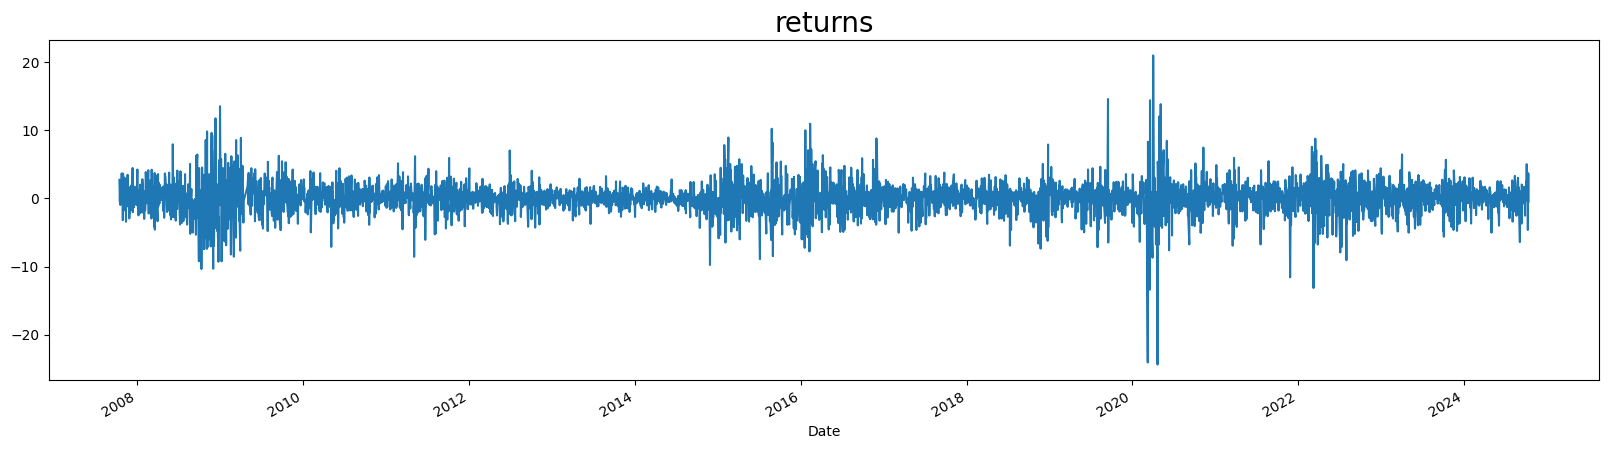

In [30]:
brent.returns.plot(figsize=(20,5))
plt.title("returns",size=20)
plt.show()

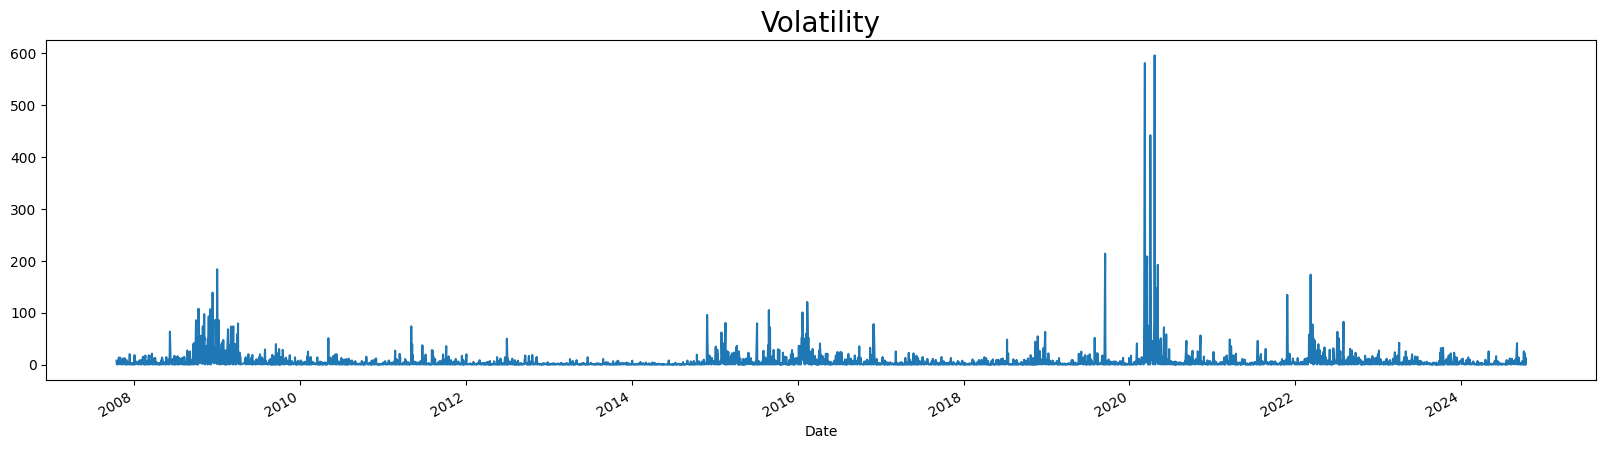

In [31]:
brent.sq_returns.plot(figsize=(20,5))
plt.title("Volatility",size=20)
plt.show()

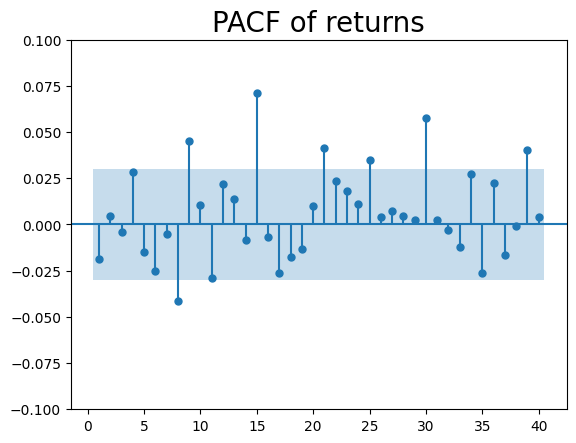

In [32]:
sgt.plot_pacf(brent.returns,lags=40,alpha=0.05,zero=False,method=('ols'))
plt.title("PACF of returns",size=20)
plt.ylim(-0.1,0.1)
plt.show()

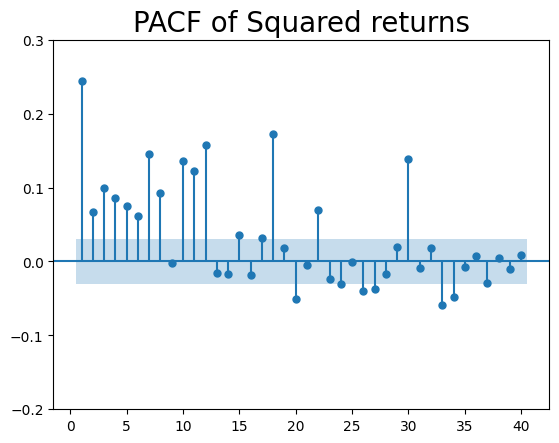

In [33]:
sgt.plot_pacf(brent.sq_returns,lags=40,alpha=0.05,zero=False,method=('ols'))
plt.title("PACF of Squared returns",size=20)
plt.ylim(-0.2,0.3)
plt.show()

# ARCH

In [34]:
model_arch_1 = arch_model(brent.returns)
results_arch_1 = model_arch_1.fit()
results_arch_1.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 21987.512359626122
Iteration:      2,   Func. Count:     14,   Neg. LLF: 4286204.083036735
Iteration:      3,   Func. Count:     22,   Neg. LLF: 8985.659497341876
Iteration:      4,   Func. Count:     28,   Neg. LLF: 8948.860740133663
Iteration:      5,   Func. Count:     34,   Neg. LLF: 8941.389712622233
Iteration:      6,   Func. Count:     40,   Neg. LLF: 9302.267357499455
Iteration:      7,   Func. Count:     46,   Neg. LLF: 8939.863058434497
Iteration:      8,   Func. Count:     52,   Neg. LLF: 8939.891336421677
Iteration:      9,   Func. Count:     58,   Neg. LLF: 8936.737189173666
Iteration:     10,   Func. Count:     63,   Neg. LLF: 8936.73717257167
Iteration:     11,   Func. Count:     67,   Neg. LLF: 8936.737172573721
Optimization terminated successfully    (Exit mode 0)
            Current function value: 8936.73717257167
            Iterations: 11
            Function evaluations: 67
            Gradient evaluations: 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8936.74
Distribution:                  Normal   AIC:                           17881.5
Method:            Maximum Likelihood   BIC:                           17906.9
                                        No. Observations:                 4224
Date:                Wed, Oct 30 2024   Df Residuals:                     4223
Time:                        02:04:59   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0554  2.767e-02      2.001  4.540e-02 [1.132e-03,  0.110]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.0705  2.231e-02      3.160  1.578e-03 [2.676e-02,  0.114]
alpha[1]       0.0945  1.649e-02      5.732  9.931e-09 [6.221e-02,  0.127]
beta[1]        0.8961  1.677e-02     53.433      0.000   [  0.863,  0.929]
==========================================================================

Covariance estimator: robust
"""

In [35]:
model_arch_1 = arch_model(brent.returns, mean= "constant", vol = "ARCH", p=1)
results_arch_1 = model_arch_1.fit()
results_arch_1.summary()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 18519.24174456143
Iteration:      2,   Func. Count:     12,   Neg. LLF: 1889814.633201016
Iteration:      3,   Func. Count:     18,   Neg. LLF: 10061.141625312372
Iteration:      4,   Func. Count:     25,   Neg. LLF: 9390.707157589124
Iteration:      5,   Func. Count:     29,   Neg. LLF: 9390.70715674616
Optimization terminated successfully    (Exit mode 0)
            Current function value: 9390.70715674616
            Iterations: 5
            Function evaluations: 29
            Gradient evaluations: 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -9390.71
Distribution:                  Normal   AIC:                           18787.4
Method:            Maximum Likelihood   BIC:                           18806.5
                                        No. Observations:                 4224
Date:                Wed, Oct 30 2024   Df Residuals:                     4223
Time:                        02:14:35   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0488  3.406e-02      1.432      0.152 [-1.798e-02,  0.116]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          3.8645      0.205     18.810  6.220e-79 [  3.462,  4.267]
alpha[1]       0.3192  4.762e-02      6.702  2.053e-11 [  0.226,  0.413]
========================================================================

Covariance estimator: robust
"""

In [36]:
model_arch_2 = arch_model(brent.returns, mean= "constant", vol = "ARCH", p=2)
results_arch_2 = model_arch_2.fit()
results_arch_2.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 19564.12033484088
Iteration:      2,   Func. Count:     14,   Neg. LLF: 9684.606319569071
Iteration:      3,   Func. Count:     21,   Neg. LLF: 15768.471633608426
Iteration:      4,   Func. Count:     28,   Neg. LLF: 9332.550541566085
Iteration:      5,   Func. Count:     35,   Neg. LLF: 9228.829054868722
Iteration:      6,   Func. Count:     40,   Neg. LLF: 9228.829062181303
Iteration:      7,   Func. Count:     46,   Neg. LLF: 9228.829043496029
Iteration:      8,   Func. Count:     50,   Neg. LLF: 9228.82904349597
Optimization terminated successfully    (Exit mode 0)
            Current function value: 9228.829043496029
            Iterations: 8
            Function evaluations: 50
            Gradient evaluations: 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -9228.83
Distribution:                  Normal   AIC:                           18465.7
Method:            Maximum Likelihood   BIC:                           18491.1
                                        No. Observations:                 4224
Date:                Wed, Oct 30 2024   Df Residuals:                     4223
Time:                        02:23:39   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0505  3.243e-02      1.556      0.120 [-1.311e-02,  0.114]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          2.7682      0.189     14.618  2.169e-48 [  2.397,  3.139]
alpha[1]       0.2559  4.214e-02      6.072  1.264e-09 [  0.173,  0.338]
alpha[2]       0.2836  4.047e-02      7.008  2.422e-12 [  0.204,  0.363]
========================================================================

Covariance estimator: robust
"""

In [46]:
model_arch_3 = arch_model(brent.returns, mean= "constant", vol = "ARCH", p=3)
results_arch_3 = model_arch_3.fit()
results_arch_3.summary()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 23514.918836942445
Iteration:      2,   Func. Count:     16,   Neg. LLF: 9536.64372785906
Iteration:      3,   Func. Count:     24,   Neg. LLF: 9345.974564533075
Iteration:      4,   Func. Count:     32,   Neg. LLF: 36782.44747122169
Iteration:      5,   Func. Count:     40,   Neg. LLF: 9199.588151686416
Iteration:      6,   Func. Count:     48,   Neg. LLF: 9181.852515161318
Iteration:      7,   Func. Count:     56,   Neg. LLF: 9137.796037285774
Iteration:      8,   Func. Count:     62,   Neg. LLF: 9137.794796142723
Iteration:      9,   Func. Count:     68,   Neg. LLF: 9137.794795570539
Optimization terminated successfully    (Exit mode 0)
            Current function value: 9137.794795570539
            Iterations: 9
            Function evaluations: 68
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -9137.79
Distribution:                  Normal   AIC:                           18285.6
Method:            Maximum Likelihood   BIC:                           18317.3
                                        No. Observations:                 4224
Date:                Wed, Oct 30 2024   Df Residuals:                     4223
Time:                        17:44:53   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0777  3.211e-02      2.421  1.548e-02 [1.480e-02,  0.141]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          2.2138      0.147     15.055  3.210e-51 [  1.926,  2.502]
alpha[1]       0.2257  4.197e-02      5.379  7.494e-08 [  0.143,  0.308]
alpha[2]       0.2252  3.470e-02      6.491  8.515e-11 [  0.157,  0.293]
alpha[3]       0.1908  3.427e-02      5.568  2.583e-08 [  0.124,  0.258]
========================================================================

Covariance estimator: robust
"""

In [45]:
model_arch_8 = arch_model(brent.returns, mean= "constant", vol = "ARCH", p=8)
results_arch_8 = model_arch_8.fit()
results_arch_8.summary()

Iteration:      1,   Func. Count:     12,   Neg. LLF: 21409.410135346006
Iteration:      2,   Func. Count:     26,   Neg. LLF: 4096712.0312871495
Iteration:      3,   Func. Count:     38,   Neg. LLF: 10218.670018550825
Iteration:      4,   Func. Count:     51,   Neg. LLF: 10166.349830437633
Iteration:      5,   Func. Count:     63,   Neg. LLF: 10227.441630546313
Iteration:      6,   Func. Count:     75,   Neg. LLF: 9904.381597586183
Iteration:      7,   Func. Count:     87,   Neg. LLF: 10786.811912778623
Iteration:      8,   Func. Count:    100,   Neg. LLF: 9751.37796244985
Iteration:      9,   Func. Count:    113,   Neg. LLF: 9591.558290021538
Iteration:     10,   Func. Count:    126,   Neg. LLF: 9170.545946044387
Iteration:     11,   Func. Count:    138,   Neg. LLF: 9498.909200730493
Iteration:     12,   Func. Count:    151,   Neg. LLF: 9278.676425156607
Iteration:     13,   Func. Count:    164,   Neg. LLF: 9074.725523268695
Iteration:     14,   Func. Count:    177,   Neg. LLF: 9162.

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -8994.91
Distribution:                  Normal   AIC:                           18009.8
Method:            Maximum Likelihood   BIC:                           18073.3
                                        No. Observations:                 4224
Date:                Wed, Oct 30 2024   Df Residuals:                     4223
Time:                        17:44:43   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0503  2.875e-02      1.750  8.012e-02 [-6.036e-03,  0.107]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          1.2756      0.140      9.118  7.686e-20     [  1.001,  1.550]
alpha[1]       0.1558  3.869e-02      4.026  5.672e-05   [7.993e-02,  0.232]
alpha[2]       0.1414  3.270e-02      4.325  1.524e-05   [7.734e-02,  0.206]
alpha[3]       0.1056  2.788e-02      3.789  1.515e-04   [5.098e-02,  0.160]
alpha[4]       0.0721  2.387e-02      3.020  2.528e-03   [2.530e-02,  0.119]
alpha[5]       0.1325  2.821e-02      4.696  2.647e-06   [7.720e-02,  0.188]
alpha[6]       0.0460  2.134e-02      2.156  3.110e-02 [4.180e-03,8.783e-02]
alpha[7]       0.0610  2.061e-02      2.958  3.101e-03   [2.056e-02,  0.101]
alpha[8]       0.0978  4.008e-02      2.441  1.465e-02   [1.928e-02,  0.176]
============================================================================

Covariance estimator: robust
"""

# GARCH

In [47]:
model_garch_1_1 = arch_model(brent.returns,mean="Constant",vol="GARCH",p=1,q=1)
results_garch_1_1 = model_garch_1_1.fit()
results_garch_1_1.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 21987.512359626122
Iteration:      2,   Func. Count:     14,   Neg. LLF: 4286204.083036735
Iteration:      3,   Func. Count:     22,   Neg. LLF: 8985.659497341876
Iteration:      4,   Func. Count:     28,   Neg. LLF: 8948.860740133663
Iteration:      5,   Func. Count:     34,   Neg. LLF: 8941.389712622233
Iteration:      6,   Func. Count:     40,   Neg. LLF: 9302.267357499455
Iteration:      7,   Func. Count:     46,   Neg. LLF: 8939.863058434497
Iteration:      8,   Func. Count:     52,   Neg. LLF: 8939.891336421677
Iteration:      9,   Func. Count:     58,   Neg. LLF: 8936.737189173666
Iteration:     10,   Func. Count:     63,   Neg. LLF: 8936.73717257167
Iteration:     11,   Func. Count:     67,   Neg. LLF: 8936.737172573721
Optimization terminated successfully    (Exit mode 0)
            Current function value: 8936.73717257167
            Iterations: 11
            Function evaluations: 67
            Gradient evaluations: 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8936.74
Distribution:                  Normal   AIC:                           17881.5
Method:            Maximum Likelihood   BIC:                           17906.9
                                        No. Observations:                 4224
Date:                Wed, Oct 30 2024   Df Residuals:                     4223
Time:                        17:53:55   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0554  2.767e-02      2.001  4.540e-02 [1.132e-03,  0.110]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.0705  2.231e-02      3.160  1.578e-03 [2.676e-02,  0.114]
alpha[1]       0.0945  1.649e-02      5.732  9.931e-09 [6.221e-02,  0.127]
beta[1]        0.8961  1.677e-02     53.433      0.000   [  0.863,  0.929]
==========================================================================

Covariance estimator: robust
"""

In [101]:
model_garch_2_2 = arch_model(brent.returns,mean="Constant",vol="GARCH",p=2,q=2)
results_garch_2_2 = model_garch_2_2.fit()
results_garch_2_2.summary()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 301630486122.265
Iteration:      2,   Func. Count:     18,   Neg. LLF: 5657377.0741649745
Iteration:      3,   Func. Count:     27,   Neg. LLF: 10515.331491100527
Iteration:      4,   Func. Count:     37,   Neg. LLF: 9049.180088917663
Iteration:      5,   Func. Count:     45,   Neg. LLF: 8965.133377592865
Iteration:      6,   Func. Count:     53,   Neg. LLF: 8939.963614900364
Iteration:      7,   Func. Count:     61,   Neg. LLF: 9035.366786317329
Iteration:      8,   Func. Count:     69,   Neg. LLF: 8937.558585992034
Iteration:      9,   Func. Count:     77,   Neg. LLF: 8937.30280255696
Iteration:     10,   Func. Count:     85,   Neg. LLF: 8940.792074134986
Iteration:     11,   Func. Count:     94,   Neg. LLF: 8937.21882430729
Iteration:     12,   Func. Count:    102,   Neg. LLF: 8937.257650359927
Iteration:     13,   Func. Count:    110,   Neg. LLF: 8936.548917686028
Iteration:     14,   Func. Count:    118,   Neg. LLF: 8936.543035

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8936.54
Distribution:                  Normal   AIC:                           17885.1
Method:            Maximum Likelihood   BIC:                           17923.2
                                        No. Observations:                 4224
Date:                Wed, Oct 30 2024   Df Residuals:                     4223
Time:                        22:55:17   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0550  2.757e-02      1.996  4.598e-02 [9.811e-04,  0.109]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.1178  3.844e-02      3.065  2.176e-03  [4.249e-02,  0.193]
alpha[1]       0.1007  2.916e-02      3.454  5.526e-04  [4.357e-02,  0.158]
alpha[2]       0.0565  3.521e-02      1.605      0.108 [-1.250e-02,  0.126]
beta[1]        0.2143      0.234      0.916      0.360    [ -0.244,  0.673]
beta[2]        0.6126      0.216      2.840  4.517e-03    [  0.190,  1.035]
===========================================================================

Covariance estimator: robust
"""

# Forecast

In [84]:
start_date = "2018-01-01"
end_date = "2020-01-01"
model_arch = arch_model(brent.returns,mean="Constant",vol="ARCH",p=8)
results_arch = model_arch.fit(last_obs = start_date)

Iteration:      1,   Func. Count:     12,   Neg. LLF: 10981.34186948707
Iteration:      2,   Func. Count:     26,   Neg. LLF: 1260753.3228804749
Iteration:      3,   Func. Count:     38,   Neg. LLF: 16732.155239204207
Iteration:      4,   Func. Count:     50,   Neg. LLF: 5793.065946848714
Iteration:      5,   Func. Count:     63,   Neg. LLF: 6016.975464142313
Iteration:      6,   Func. Count:     76,   Neg. LLF: 5759.621870332267
Iteration:      7,   Func. Count:     89,   Neg. LLF: 6269.354396373886
Iteration:      8,   Func. Count:    102,   Neg. LLF: 6006.444941828117
Iteration:      9,   Func. Count:    115,   Neg. LLF: 5528.118750529471
Iteration:     10,   Func. Count:    128,   Neg. LLF: 5563.288793242751
Iteration:     11,   Func. Count:    141,   Neg. LLF: 5255.806185420735
Iteration:     12,   Func. Count:    153,   Neg. LLF: 5284.475081365034
Iteration:     13,   Func. Count:    166,   Neg. LLF: 5256.628133415077
Iteration:     14,   Func. Count:    178,   Neg. LLF: 5274.590

In [85]:
pred_arch = results_arch.forecast(horizon=1, align='target')

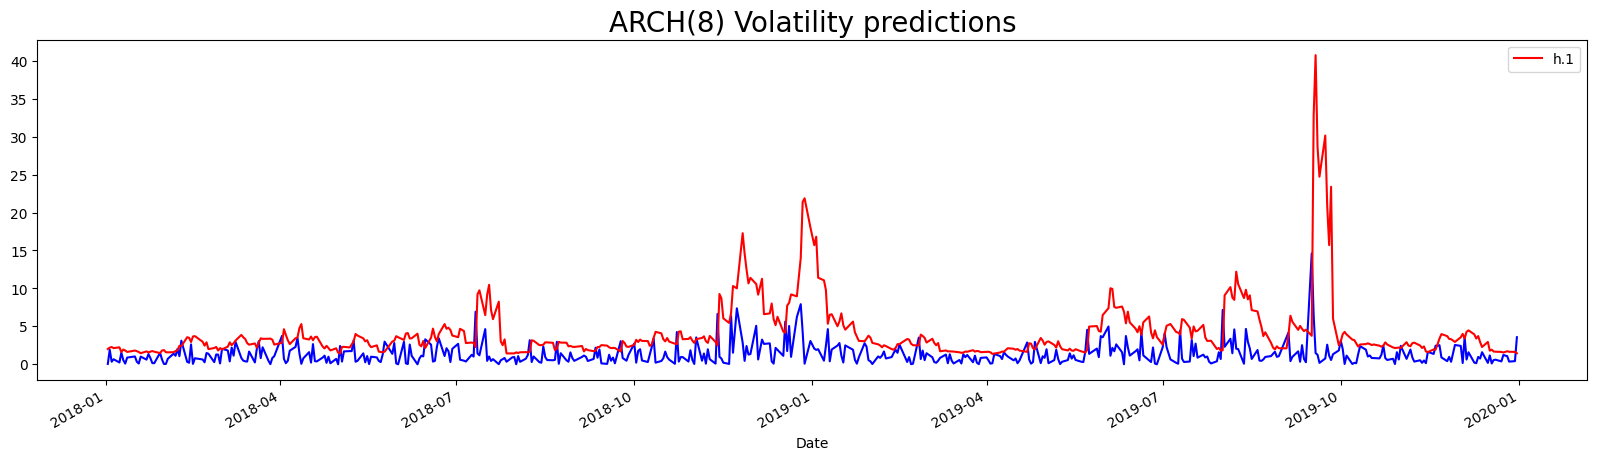

In [88]:
pred_arch.residual_variance[start_date:end_date].plot(figsize=(20,5),color ="red",zorder=2)
brent.returns[start_date:end_date].abs().plot(color ="blue",zorder=1)
plt.title("ARCH(8) Volatility predictions",size =20)
plt.show()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 84984.18811614063
Iteration:      2,   Func. Count:     14,   Neg. LLF: 5644.875568426139
Iteration:      3,   Func. Count:     20,   Neg. LLF: 12862000.504216041
Iteration:      4,   Func. Count:     26,   Neg. LLF: 5351.815970868379
Iteration:      5,   Func. Count:     32,   Neg. LLF: 5201.919729610095
Iteration:      6,   Func. Count:     38,   Neg. LLF: 5203.838770740424
Iteration:      7,   Func. Count:     44,   Neg. LLF: 5199.142000639334
Iteration:      8,   Func. Count:     50,   Neg. LLF: 5186.684678794169
Iteration:      9,   Func. Count:     56,   Neg. LLF: 5209.1692055365165
Iteration:     10,   Func. Count:     62,   Neg. LLF: 5185.784105601174
Iteration:     11,   Func. Count:     67,   Neg. LLF: 5185.7847620429
Iteration:     12,   Func. Count:     73,   Neg. LLF: 5185.776142114847
Iteration:     13,   Func. Count:     78,   Neg. LLF: 5185.77604972952
Iteration:     14,   Func. Count:     82,   Neg. LLF: 5185.776049

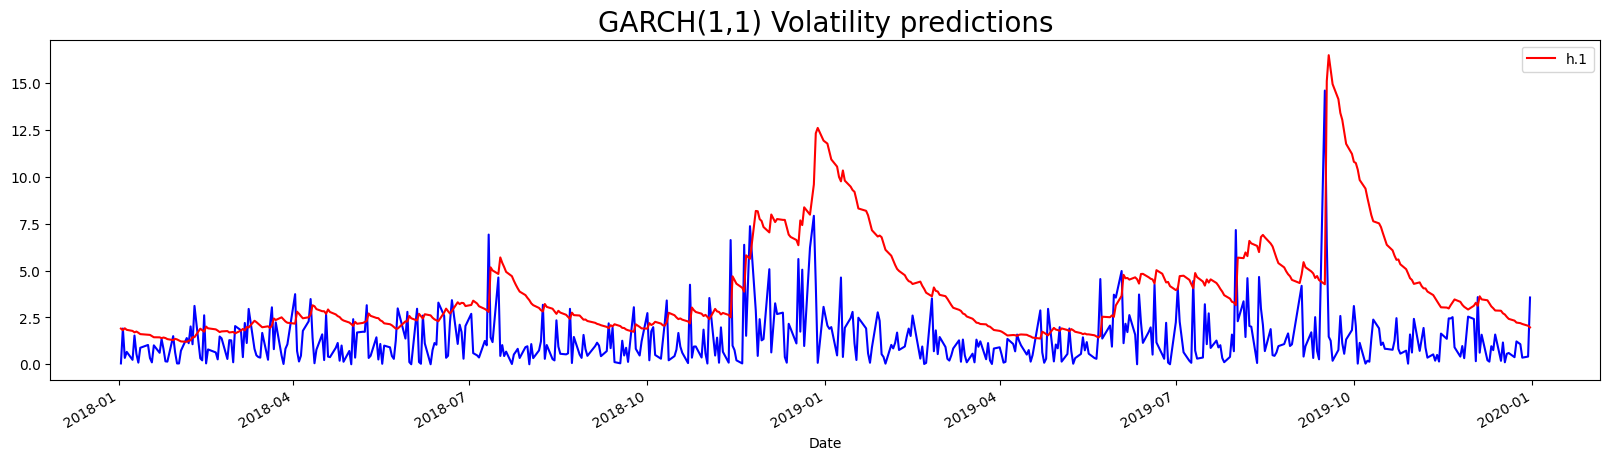

In [89]:
model_garch = arch_model(brent.returns,mean="Constant",vol="GARCH",p=1,q=1)
results_garch = model_garch.fit(last_obs = start_date)

pred_garch = results_garch.forecast(horizon=1, align='target')

pred_garch.residual_variance[start_date:end_date].plot(figsize=(20,5),color ="red",zorder=2)
brent.returns[start_date:end_date].abs().plot(color ="blue",zorder=1)
plt.title("GARCH(1,1) Volatility predictions",size =20)
plt.show()

In [91]:
pred_garch = results_garch.forecast(horizon=100, align='target')
pred_garch.residual_variance[-1:]

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.091,h.092,h.093,h.094,h.095,h.096,h.097,h.098,h.099,h.100
Date,,,,,,,,,,,,,,,,,,,,,
2024-10-11,5.983988,5.579533,5.849076,4.983322,4.524655,4.753504,3.655741,3.839558,3.716276,3.906084,...,3.499263,2.942811,3.017257,2.917114,2.969003,2.786498,2.820164,2.869138,2.880107,2.908201


Iteration:      1,   Func. Count:      8,   Neg. LLF: 46015385852.87677
Iteration:      2,   Func. Count:     18,   Neg. LLF: 38783860438.81419
Iteration:      3,   Func. Count:     28,   Neg. LLF: 7012.023111993967
Iteration:      4,   Func. Count:     37,   Neg. LLF: 5278.034242517582
Iteration:      5,   Func. Count:     45,   Neg. LLF: 5214.823373777062
Iteration:      6,   Func. Count:     53,   Neg. LLF: 5278.804289486907
Iteration:      7,   Func. Count:     61,   Neg. LLF: 5197.153133764979
Iteration:      8,   Func. Count:     69,   Neg. LLF: 5195.7416259723195
Iteration:      9,   Func. Count:     77,   Neg. LLF: 5197.6728930245
Iteration:     10,   Func. Count:     85,   Neg. LLF: 5189.96772970409
Iteration:     11,   Func. Count:     93,   Neg. LLF: 5187.013254691818
Iteration:     12,   Func. Count:    101,   Neg. LLF: 5189.0283249107
Iteration:     13,   Func. Count:    109,   Neg. LLF: 5185.5548267062
Iteration:     14,   Func. Count:    116,   Neg. LLF: 5186.77849722520

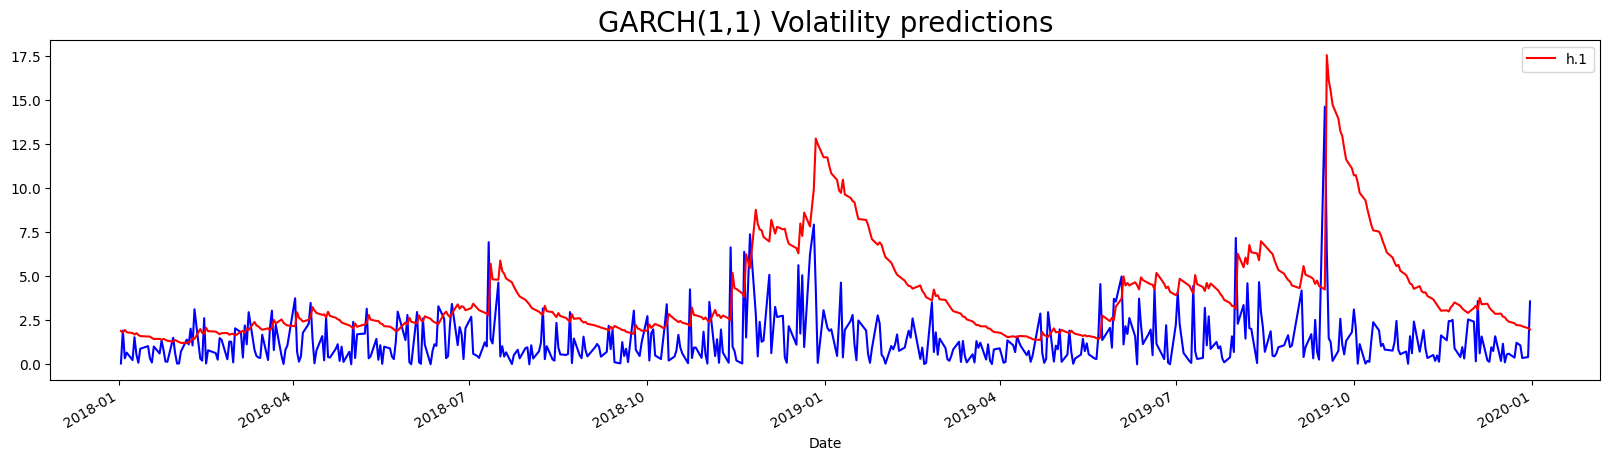

In [100]:
model_garch = arch_model(brent.returns,mean="Constant",vol="GARCH",p=2,q=2)
results_garch = model_garch.fit(last_obs = start_date)

pred_garch = results_garch.forecast(horizon=1, align='target')

pred_garch.residual_variance[start_date:end_date].plot(figsize=(20,5),color ="red",zorder=2)
brent.returns[start_date:end_date].abs().plot(color ="blue",zorder=1)
plt.title("GARCH(1,1) Volatility predictions",size =20)
plt.show()